<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/Pivotpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

# TSMC 주가 데이터 수집
ticker = "TSM"
tsmc_data = yf.download(ticker, period="1y")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['Pivot'] - data['Low']
    data['S1'] = 2 * data['Pivot'] - data['High']
    data['R2'] = data['Pivot'] + (data['High'] - data['Low'])
    data['S2'] = data['Pivot'] - (data['High'] - data['Low'])
    data['R3'] = data['Pivot'] + 2 * (data['High'] - data['Low'])
    data['S3'] = data['Pivot'] - 2 * (data['High'] - data['Low'])
    return data

# 동적 지수(D지수) 계산 - 예시로 이동 평균(20일) 사용
def calculate_dynamic_indices(data):
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['Bollinger High'] = data['MA20'] + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger Low'] = data['MA20'] - 2 * data['Close'].rolling(window=20).std()
    return data

# 피봇 포인트와 동적 지수 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)
tsmc_data = calculate_dynamic_indices(tsmc_data)

# 필요한 컬럼만 선택하여 출력
result_data = tsmc_data[['High', 'Low', 'Close', 'Pivot', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'MA20', 'Bollinger High', 'Bollinger Low']]
result_data.tail()  # 데이터프레임의 마지막 5행을 출력


[*********************100%%**********************]  1 of 1 completed


,High,Low,Close,Pivot,R1,S1,R2,S2,R3,S3,MA20,Bollinger High,Bollinger Low
Date,,,,,,,,,,,,,
2024-07-15,190.059998,184.080002,185.220001,186.453334,188.826665,182.846670,192.433329,180.473338,198.413325,174.493342,178.524003,191.823249,165.224756
2024-07-16,189.589996,185.020004,186.039993,186.883331,188.746658,184.176666,191.453323,182.313339,196.023315,177.743347,179.200503,192.587858,165.813147
2024-07-17,176.580002,170.509995,171.199997,172.763331,175.016668,168.946660,178.833338,166.693324,184.903346,160.623316,178.898502,192.736981,165.060024
2024-07-18,178.690002,164.509995,171.869995,171.689997,178.870000,164.689992,185.870005,157.509989,200.050013,143.329981,178.507502,192.689458,164.325546
2024-07-19,170.500000,165.320007,167.770004,167.863337,170.406667,165.226674,173.043330,162.683345,178.223323,157.503352,178.127002,193.051192,163.202812


[*********************100%%**********************]  1 of 1 completed


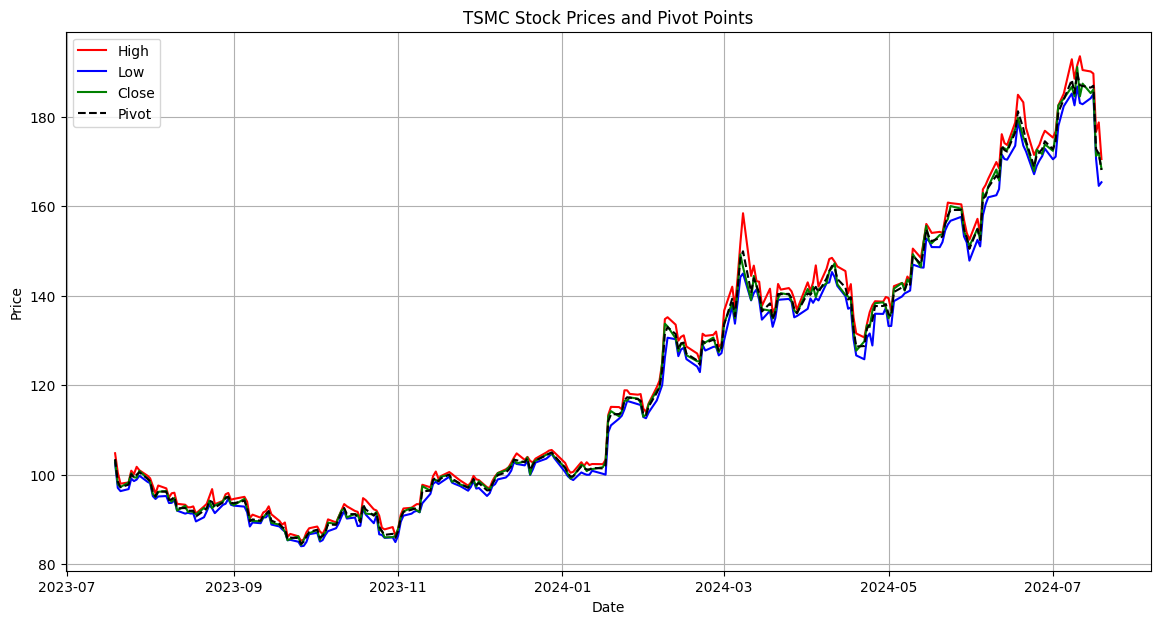

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# TSMC 주가 데이터 수집
ticker = "TSM"
tsmc_data = yf.download(ticker, period="1y")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['Pivot'] - data['Low']
    data['S1'] = 2 * data['Pivot'] - data['High']
    data['R2'] = data['Pivot'] + (data['High'] - data['Low'])
    data['S2'] = data['Pivot'] - (data['High'] - data['Low'])
    data['R3'] = data['Pivot'] + 2 * (data['High'] - data['Low'])
    data['S3'] = data['Pivot'] - 2 * (data['High'] - data['Low'])
    return data

# 피봇 포인트 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(tsmc_data.index, tsmc_data['High'], label='High', color='r')
plt.plot(tsmc_data.index, tsmc_data['Low'], label='Low', color='b')
plt.plot(tsmc_data.index, tsmc_data['Close'], label='Close', color='g')
plt.plot(tsmc_data.index, tsmc_data['Pivot'], label='Pivot', color='k', linestyle='--')

plt.title('TSMC Stock Prices and Pivot Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


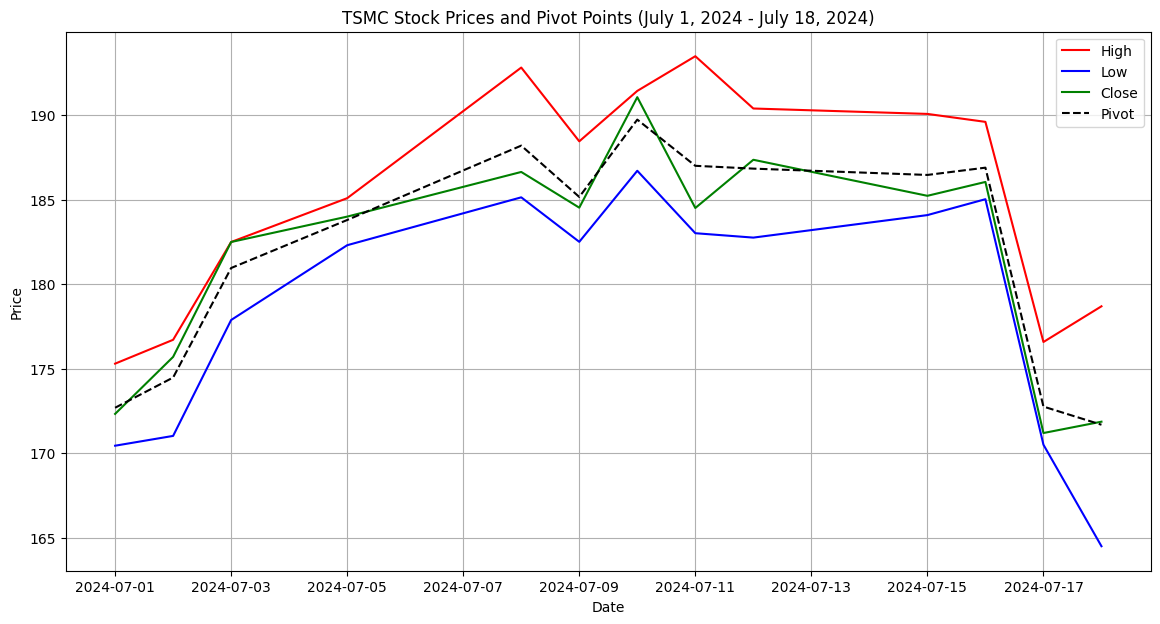

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# TSMC 주가 데이터 수집 (2024년 7월 1일부터 7월 18일까지)
ticker = "TSM"
tsmc_data = yf.download(ticker, start="2024-07-01", end="2024-07-19")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    return data

# 피봇 포인트 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(tsmc_data.index, tsmc_data['High'], label='High', color='r')
plt.plot(tsmc_data.index, tsmc_data['Low'], label='Low', color='b')
plt.plot(tsmc_data.index, tsmc_data['Close'], label='Close', color='g')
plt.plot(tsmc_data.index, tsmc_data['Pivot'], label='Pivot', color='k', linestyle='--')

plt.title('TSMC Stock Prices and Pivot Points (July 1, 2024 - July 18, 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


                  Open       Close          R1          S1
Date                                                      
2024-07-01  174.240005  172.330002  174.936671  170.086665
2024-07-02  171.130005  175.699997  177.930003  172.249995
2024-07-03  177.990005  182.490005  184.026672  179.416672
2024-07-05  184.139999  183.990005  185.280004  182.500005
2024-07-08  190.000000  186.630005  191.243337  183.573339
2024-07-09  188.089996  184.520004  187.806671  181.866669
2024-07-10  188.279999  191.050003  192.746668  188.026667
2024-07-11  193.089996  184.500000  190.976669  180.516663
2024-07-12  183.070007  187.350006  190.903341  183.273336
2024-07-15  188.679993  185.220001  188.826665  182.846670
2024-07-16  188.270004  186.039993  188.746658  184.176666
2024-07-17  175.220001  171.199997  175.016668  168.946660
2024-07-18  175.500000  171.869995  178.870000  164.689992


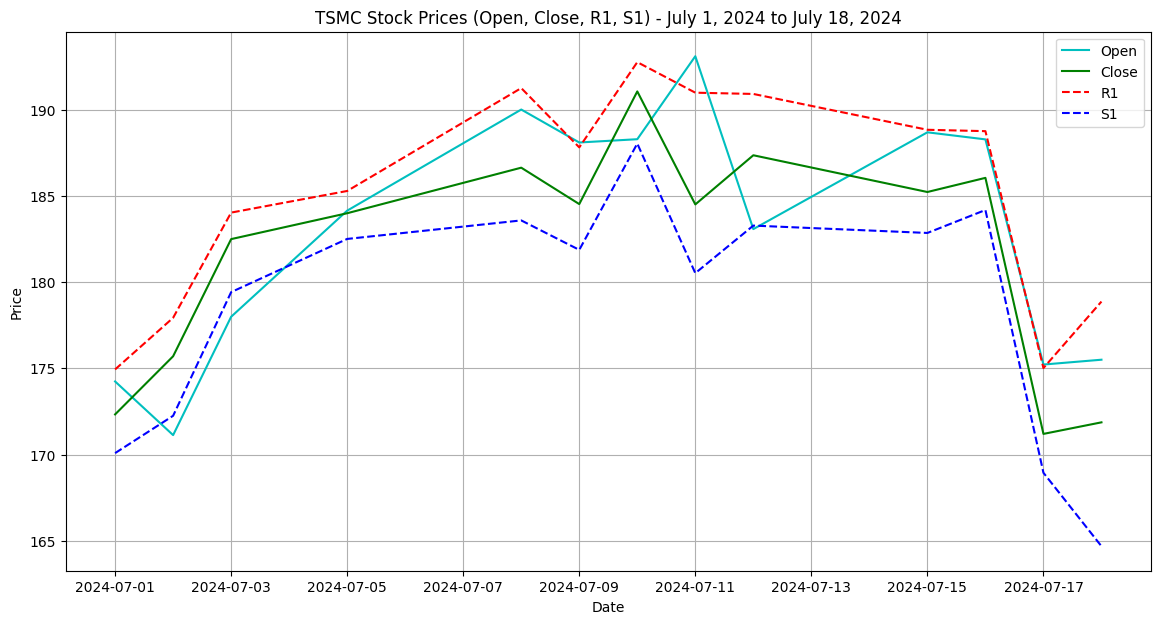

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# TSMC 주가 데이터 수집 (2024년 7월 1일부터 7월 18일까지)
ticker = "TSM"
tsmc_data = yf.download(ticker, start="2024-07-01", end="2024-07-19")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['Pivot'] - data['Low']
    data['S1'] = 2 * data['Pivot'] - data['High']
    return data

# 피봇 포인트 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)

# 필요한 컬럼만 선택하여 데이터프레임 작성
result_data = tsmc_data[['Open', 'Close', 'R1', 'S1']]

print(result_data)

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(tsmc_data.index, tsmc_data['Open'], label='Open', color='c')
plt.plot(tsmc_data.index, tsmc_data['Close'], label='Close', color='g')
plt.plot(tsmc_data.index, tsmc_data['R1'], label='R1', color='r', linestyle='--')
plt.plot(tsmc_data.index, tsmc_data['S1'], label='S1', color='b', linestyle='--')

plt.title('TSMC Stock Prices (Open, Close, R1, S1) - July 1, 2024 to July 18, 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import yfinance as yf

# TSMC의 2024년 1월 2일부터 7월 18일까지 주가 데이터 다운로드
ticker = "TSM"
tsmc_data_2024 = yf.download(ticker, start="2024-01-02", end="2024-07-19")

# 2024년 첫 거래일의 종가
start_price_2024_actual = tsmc_data_2024['Close'].iloc[0]

# 2024년 7월 18일의 종가
end_price_2024_actual = tsmc_data_2024['Close'].iloc[-1]

# 주가수익률 계산
price_return_2024_actual = (end_price_2024_actual - start_price_2024_actual) / start_price_2024_actual

print(f"2024년 1월 2일부터 7월 18일까지의 주가수익률: {price_return_2024_actual * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

2024년 1월 2일부터 7월 18일까지의 주가수익률: 69.28%


In [ ]:
import yfinance as yf
import pandas as pd

# TSMC의 1년간 주가 데이터 다운로드
ticker = "TSM"
tsmc_data = yf.download(ticker, period="1y")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['Pivot'] - data['Low']
    data['S1'] = 2 * data['Pivot'] - data['High']
    return data

# 피봇 포인트 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)

# Close가 Pivot Point를 상회할 확률과 하회할 확률 계산
close_above_pivot = (tsmc_data['Close'] > tsmc_data['Pivot']).sum()
close_below_pivot = (tsmc_data['Close'] < tsmc_data['Pivot']).sum()
total_days = len(tsmc_data)

probability_close_above_pivot = close_above_pivot / total_days
probability_close_below_pivot = close_below_pivot / total_days

print(f"Close가 Pivot Point를 상회할 확률: {probability_close_above_pivot * 100:.2f}%")
print(f"Close가 Pivot Point를 하회할 확률: {probability_close_below_pivot * 100:.2f}%")

# Open이 Pivot Point를 상회할 확률과 하회할 확률 계산
open_above_pivot = (tsmc_data['Open'] > tsmc_data['Pivot']).sum()
open_below_pivot = (tsmc_data['Open'] < tsmc_data['Pivot']).sum()

probability_open_above_pivot = open_above_pivot / total_days
probability_open_below_pivot = open_below_pivot / total_days

print(f"Open이 Pivot Point를 상회할 확률: {probability_open_above_pivot * 100:.2f}%")
print(f"Open이 Pivot Point를 하회할 확률: {probability_open_below_pivot * 100:.2f}%")

# 동적 지지선과 저항선 계산 (20일 이동 평균과 볼린저 밴드 사용)
def calculate_dynamic_indices(data):
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['Bollinger High'] = data['MA20'] + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger Low'] = data['MA20'] - 2 * data['Close'].rolling(window=20).std()
    return data

tsmc_data = calculate_dynamic_indices(tsmc_data)

# Close가 Bollinger Low와 Bollinger High 사이에 있는 확률 계산
close_between_bands = ((tsmc_data['Close'] > tsmc_data['Bollinger Low']) & (tsmc_data['Close'] < tsmc_data['Bollinger High'])).sum()
probability_between_bands = close_between_bands / total_days

print(f"Close가 Bollinger Bands 사이에 있을 확률: {probability_between_bands * 100:.2f}%")

# 일일 종가가 증가할 확률 계산
tsmc_data['Previous_Close'] = tsmc_data['Close'].shift(1)
close_above_previous_close = (tsmc_data['Close'] > tsmc_data['Previous_Close']).sum()
probability_close_above_previous_close = close_above_previous_close / (total_days - 1)

print(f"일일 종가가 증가할 확률: {probability_close_above_previous_close * 100:.2f}%")

# 2024년 1월 2일부터 7월 18일까지의 주가수익률 계산
tsmc_data_2024 = yf.download(ticker, start="2024-01-02", end="2024-07-19")
start_price_2024_actual = tsmc_data_2024['Close'].iloc[0]
end_price_2024_actual = tsmc_data_2024['Close'].iloc[-1]
price_return_2024_actual = (end_price_2024_actual - start_price_2024_actual) / start_price_2024_actual

print(f"2024년 1월 2일부터 7월 18일까지의 주가수익률: {price_return_2024_actual * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Close가 Pivot Point를 상회할 확률: 50.20%
Close가 Pivot Point를 하회할 확률: 49.80%
Open이 Pivot Point를 상회할 확률: 51.78%
Open이 Pivot Point를 하회할 확률: 48.22%
Close가 Bollinger Bands 사이에 있을 확률: 79.45%
일일 종가가 증가할 확률: 52.78%
2024년 1월 2일부터 7월 18일까지의 주가수익률: 69.28%


In [ ]:
import pandas as pd
import yfinance as yf

# TSMC의 1년간 주가 데이터 다운로드
ticker = "TSM"
tsmc_data = yf.download(ticker, period="1y")

# 피봇 포인트 지수 계산
def calculate_pivot_points(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['Pivot'] - data['Low']
    data['S1'] = 2 * data['Pivot'] - data['High']
    return data

# 피봇 포인트 계산 적용
tsmc_data = calculate_pivot_points(tsmc_data)

# 동적 지지선과 저항선 계산 (20일 이동 평균과 볼린저 밴드 사용)
def calculate_dynamic_indices(data):
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['Bollinger High'] = data['MA20'] + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger Low'] = data['MA20'] - 2 * data['Close'].rolling(window=20).std()
    return data

tsmc_data = calculate_dynamic_indices(tsmc_data)

# Close가 Bollinger Low와 Bollinger High를 벗어나는 일자와 당일 종가수익률 계산
out_of_bands = tsmc_data[(tsmc_data['Close'] < tsmc_data['Bollinger Low']) | (tsmc_data['Close'] > tsmc_data['Bollinger High'])]
out_of_bands['Daily_Return'] = out_of_bands['Close'].pct_change()

# 벗어난 일자와 당일 종가수익률 데이터프레임 작성
out_of_bands_results = out_of_bands[['Close', 'Bollinger Low', 'Bollinger High', 'Daily_Return']]



out_of_bands_results


[*********************100%%**********************]  1 of 1 completed
<ipython-input-11-bc68f52c520d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_bands['Daily_Return'] = out_of_bands['Close'].pct_change()


,Close,Bollinger Low,Bollinger High,Daily_Return
Date,,,,
2023-09-07,90.050003,90.160658,95.663341,NaN
2023-09-08,89.639999,89.688689,95.619311,-0.004553
2023-09-21,85.360001,85.828746,96.618255,-0.047747
2023-10-11,92.000000,83.366755,91.927246,0.077788
2023-10-12,92.419998,83.218989,92.170011,0.004565
2023-11-10,97.440002,84.736975,96.101026,0.054317
2023-11-14,98.910004,83.792337,98.356664,0.015086
2023-12-11,100.949997,96.039521,100.877480,0.020625
2023-12-12,101.599998,96.115221,101.319780,0.006439


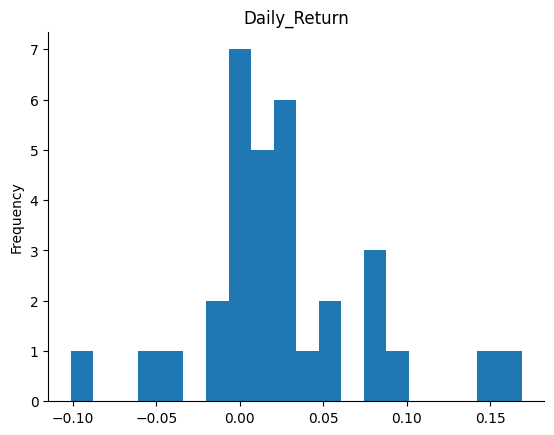

In [ ]:
# @title Daily_Return

from matplotlib import pyplot as plt
out_of_bands_results['Daily_Return'].plot(kind='hist', bins=20, title='Daily_Return')
plt.gca().spines[['top', 'right',]].set_visible(False)